<a href="https://colab.research.google.com/github/youngha-Ju/gong_gong_bigdata_mulcam/blob/main/%EC%9E%90%EC%B9%98%EA%B5%AC_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd '/content/drive/MyDrive/Colab Notebooks/new_project'

/content/drive/MyDrive/Colab Notebooks/new_project


In [2]:
!pip install geopandas

In [23]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib import font_manager 
import folium

In [4]:
!apt-get updata -qq
!apt-get install fonts-nanum* -qq
font_manager._rebuild()

E: Invalid operation updata


In [5]:
comb = pd.read_csv('comb_data.csv')
pop = pd.read_csv('subway_POP.csv')
sales = pd.read_excel('구별_매출데이터.xlsx')
pop.drop(columns='Unnamed: 0', inplace=True)
pop.columns = ['자치구명', 'sub_pop']
comb.drop(columns='Unnamed: 0', inplace=True)
pop['자치구명'] = pop['자치구명'] + '구'
pop.loc[23, '자치구명'] = '중구'

In [6]:
comb

,자치구명,금연구역 수,흡연구역 수,인구 수,인구 비율,면적,흡연율,흡연단속건수
0,종로구,10686,184,145512,0.015249,23.91,18.6,969
1,중구,12480,422,122858,0.012875,9.96,23.0,1786
2,용산구,8102,212,224145,0.023490,21.87,17.7,191
3,성동구,7620,255,287820,0.030163,16.86,19.5,950
4,광진구,9982,158,341112,0.035748,17.06,21.2,1415
5,동대문구,9852,393,337846,0.035405,14.22,17.8,799
6,중랑구,7202,248,388554,0.040719,18.50,21.5,223
7,성북구,10538,231,432628,0.045338,24.58,19.2,466
8,강북구,7400,350,300887,0.031532,23.60,23.5,264
9,도봉구,6257,227,318718,0.033401,20.65,19.5,358


In [7]:
sales

,자치구명,유동인구,한식/백반/한정식 점포 수,한식/백반/한정식 평균 매출,커피/카페 전문점 점포 수,커피/카페 전문점 평균 매출,치킨 점포 수,치킨 평균 매출,갈비/삼겹살 점포 수,갈비/삼겹살 평균 매출,호프/맥주 점포수,호프/맥주 평균 매출,편의점 점포수,편의점 평균 매출,점포수 합계,매출 합계(만원),총 평균 매출
0,강남구,128683,3526,2378,2448,1611,260,1875,290,3377,353,1710,658,7803,6877,10951,2840.394067
1,강동구,49050,1327,1313,813,1124,199,1404,177,1616,362,906,315,7106,2878,6363,2011.102502
2,강서구,69903,1677,1233,1087,1273,234,1219,175,1886,450,855,470,8059,3623,6466,2274.156224
3,강북구,24678,1091,1255,334,1143,142,1234,110,1793,265,778,212,7001,1942,6203,1963.855304
4,관악구,46866,1297,1224,765,1233,242,1147,173,1900,472,887,394,8947,2949,6391,2401.094947
5,광진구,43676,1040,1466,801,960,178,1275,160,2478,306,902,346,7674,2485,7081,2353.418913
6,구로구,53578,1146,1469,636,1273,217,1292,174,2102,484,656,313,8746,2657,6792,2331.281897
7,금천구,33311,815,1314,490,1110,132,990,122,1639,254,877,247,6768,1813,5930,2117.982350
8,노원구,50169,928,1224,624,1133,222,1453,134,1731,325,855,284,7270,2233,6396,2122.677564
9,동대문구,46425,1300,1214,516,1063,149,1093,133,2435,332,578,309,6643,2430,6383,1999.178189


In [93]:
merge = pd.merge(comb, pop)
merge = pd.merge(merge, sales[['자치구명', '유동인구', '점포수 합계', '총 평균 매출']])
y_d = merge['흡연단속건수']
merge.drop(columns='흡연단속건수', inplace=True)
merge['흡연단속건수'] = list(y_d)

In [9]:
merge

,자치구명,금연구역 수,흡연구역 수,인구 수,인구 비율,면적,흡연율,sub_pop,유동인구,점포수 합계,총 평균 매출,흡연단속건수
0,종로구,10686,184,145512,0.015249,23.91,18.6,344224,38815,3013,2146.222702,969
1,중구,12480,422,122858,0.012875,9.96,23.0,311710,39790,2709,2516.067183,1786
2,용산구,8102,212,224145,0.023490,21.87,17.7,211825,49846,2485,2267.656338,191
3,성동구,7620,255,287820,0.030163,16.86,19.5,414160,48445,2318,2549.215272,950
4,광진구,9982,158,341112,0.035748,17.06,21.2,243426,43676,2485,2353.418913,1415
5,동대문구,9852,393,337846,0.035405,14.22,17.8,167358,46425,2430,1999.178189,799
6,중랑구,7202,248,388554,0.040719,18.50,21.5,156772,36315,2095,1867.461098,223
7,성북구,10538,231,432628,0.045338,24.58,19.2,149850,44384,2449,2267.454063,466
8,강북구,7400,350,300887,0.031532,23.60,23.5,125649,24678,1942,1963.855304,264
9,도봉구,6257,227,318718,0.033401,20.65,19.5,254260,31550,1451,2055.238456,358


In [10]:
#merge.to_csv('merge_data.csv')

In [94]:
merge['인구 밀도'] = merge['인구 수'] / merge['면적']
merge['흡연구역/금연구역'] = merge['흡연구역 수'] / merge['금연구역 수']
merge['총 매출'] = merge['점포수 합계'] * merge['총 평균 매출']
merge['흡연인구'] = merge['인구 수'] * (merge['흡연율'] / 100)

In [12]:
!pip install statsmodels

In [13]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import RobustScaler
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [95]:
QT = QuantileTransformer(output_distribution='uniform')
# merge['흡연단속건수'] = QT.fit_transform(np.array(merge['흡연단속건수']).reshape(-1,1))
# merge
merge.iloc[:, 1:] = QT.fit_transform(merge.iloc[:, 1:])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (25). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


In [15]:
# PT = PowerTransformer()
# merge['흡연단속건수'] = PT.fit_transform(np.array(merge['흡연단속건수']).reshape(-1,1))
# merge

In [96]:
merge_corr = merge.corr()
merge.corr()

,금연구역 수,흡연구역 수,인구 수,인구 비율,면적,흡연율,sub_pop,유동인구,점포수 합계,총 평균 매출,흡연단속건수,인구 밀도,흡연구역/금연구역,총 매출,흡연인구
금연구역 수,1.000000,9.692308e-02,0.540000,0.540000,6.561538e-01,-0.513869,0.543077,0.780000,0.876707,0.384615,0.631538,-0.335385,-0.472308,0.873077,0.315385
흡연구역 수,0.096923,1.000000e+00,-0.125385,-0.125385,-6.148928e-18,0.325933,0.072308,0.025385,0.283901,-0.089231,-0.070769,-0.254615,0.776923,0.253846,-0.049231
인구 수,0.540000,-1.253846e-01,1.000000,1.000000,7.138462e-01,-0.377015,0.113077,0.553077,0.367378,0.153077,0.260769,0.208462,-0.358462,0.330769,0.911538
인구 비율,0.540000,-1.253846e-01,1.000000,1.000000,7.138462e-01,-0.377015,0.113077,0.553077,0.367378,0.153077,0.260769,0.208462,-0.358462,0.330769,0.911538
면적,0.656154,-6.148928e-18,0.713846,0.713846,1.000000e+00,-0.350712,0.237692,0.571538,0.623966,0.113846,0.269231,-0.458462,-0.287692,0.513846,0.610000
흡연율,-0.513869,3.259333e-01,-0.377015,-0.377015,-3.507118e-01,1.000000,-0.295437,-0.694562,-0.384713,-0.124655,-0.312972,-0.100639,0.597354,-0.393026,-0.026685
sub_pop,0.543077,7.230769e-02,0.113077,0.113077,2.376923e-01,-0.295437,1.000000,0.543077,0.534334,0.580769,0.463077,-0.290000,-0.235385,0.683077,-0.036923
유동인구,0.780000,2.538462e-02,0.553077,0.553077,5.715385e-01,-0.694562,0.543077,1.000000,0.715907,0.503077,0.523846,-0.157692,-0.495385,0.803846,0.278462
점포수 합계,0.876707,2.839008e-01,0.367378,0.367378,6.239662e-01,-0.384713,0.534334,0.715907,1.000000,0.273899,0.431237,-0.403154,-0.249663,0.935565,0.205039
총 평균 매출,0.384615,-8.923077e-02,0.153077,0.153077,1.138462e-01,-0.124655,0.580769,0.503077,0.273899,1.000000,0.500769,-0.166154,-0.356154,0.556154,0.058462


In [118]:
X = merge[['금연구역 수', '유동인구', '흡연단속건수']]

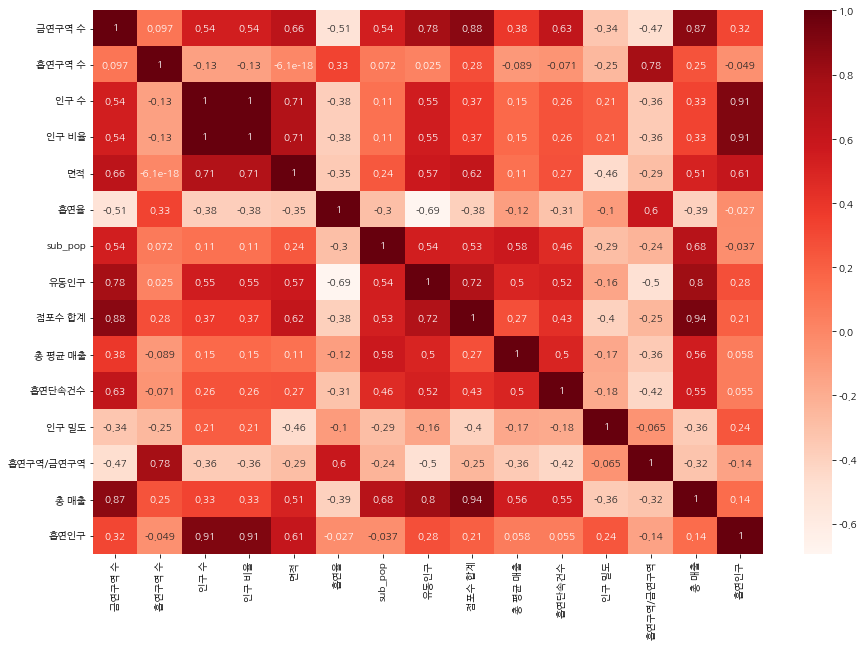

In [119]:
plt.figure(figsize=(15,10))
plt.rc('font', family = 'NanumGothic')
matplotlib.rcParams['axes.unicode_minus'] = False
sns.heatmap(merge_corr, annot=True, cmap='Reds')
plt.show()

In [25]:
from sklearn.cluster import KMeans

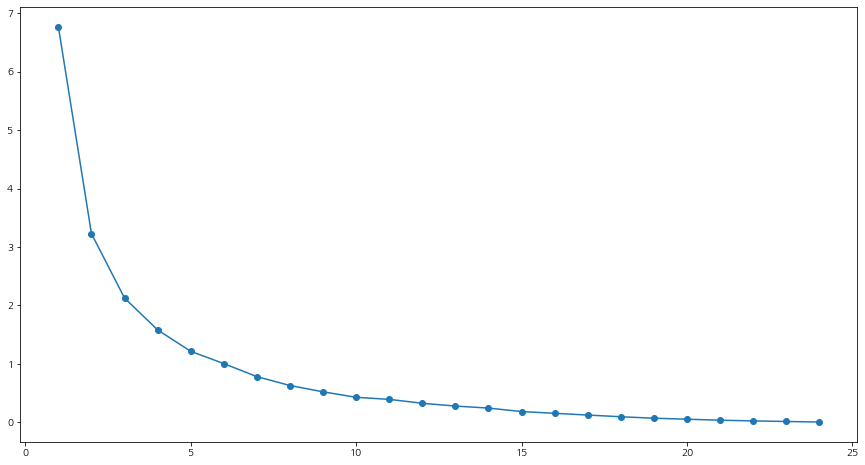

In [120]:
distortions = []
for i in range(1, 25):
  km = KMeans(n_clusters=i)
  km = km.fit(X)
  distortions.append(km.inertia_)
plt.figure(figsize=(15,8))
plt.plot(range(1,25),distortions, marker = 'o')
plt.show()

In [121]:
km = KMeans(n_clusters = 3, n_init=100)
model = km.fit(X)
pre = model.predict(X)
pre

array([2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 1, 2, 0, 2, 2, 1, 2, 0, 1, 0, 2, 1,
       1, 1, 2], dtype=int32)

In [ ]:
X['cluster'] = pre
X['자치구명'] = merge['자치구명']

In [37]:
from mpl_toolkits.mplot3d import Axes3D

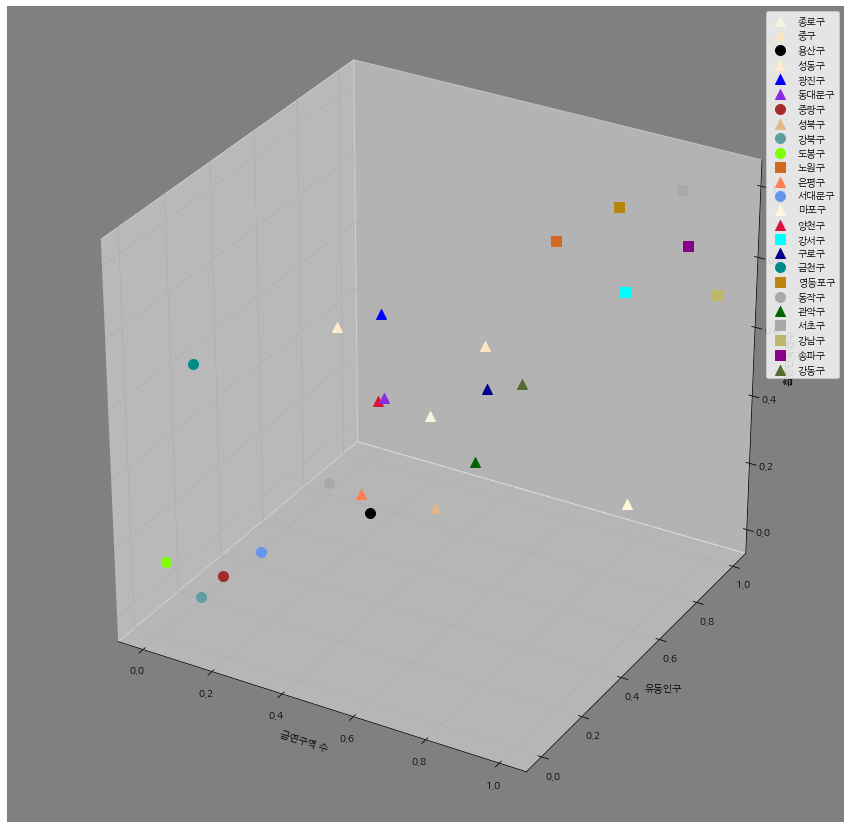

In [123]:
colors = list(matplotlib.colors.CSS4_COLORS)
fig = plt.figure(figsize=(15, 15))
# for i in range(len(X)):
  # if X.loc[i, 'cluster'] == 0:
  #   color = 'r'
  # elif X.loc[i, 'cluster'] == 1:
  #   color = 'g'
  # else:
  #   color = 'b'
ax = fig.add_subplot(111, projection='3d', facecolor='gray')
for i in range(25):
  x = X.copy()
  markers = ['o', 's', '^', 'x']
  labels = X.loc[i, '자치구명']
  ax.scatter(x.loc[i, '금연구역 수'], x.loc[i, '유동인구'], x.loc[i, '흡연단속건수'], c=colors[i+5], marker=markers[x.loc[i, 'cluster']], s=100, cmap='jet', label=labels)
  ax.set_xlabel('금연구역 수')
  ax.set_ylabel('유동인구')
  ax.set_zlabel('흡연단속건수')
legend_loc='upper right'
plt.legend(loc=legend_loc)
plt.show()

In [128]:
cluster_mean = merge.copy()
cluster_mean['cluster'] = pre
clu_col = list(cluster_mean.columns).remove('cluster')
#cluster_mean.groupby(clu_col)['cluster'].mean()
clu_col

In [18]:
lr = LinearRegression(normalize=True)
x_sm = np.array(list(merge['금연구역 수'])).reshape(-1, 1)
y = np.array(list(merge['흡연단속건수'])).reshape(-1, 1)
lr.fit(x_sm, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

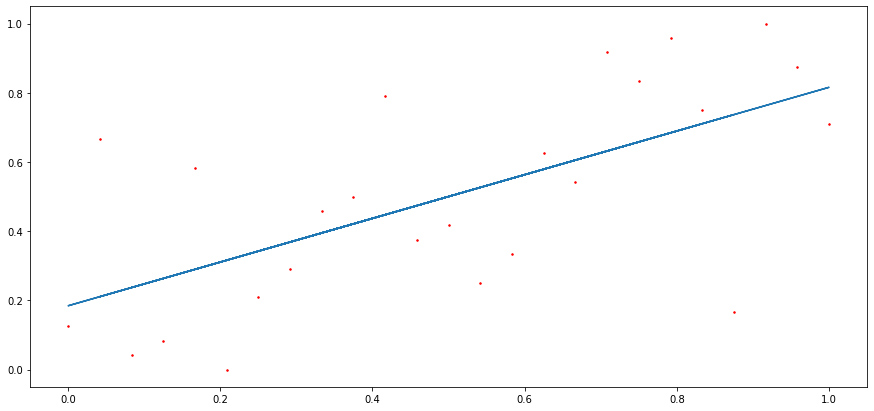

In [19]:
pre = lr.predict(x_sm)
plt.figure(figsize=(15,7))
plt.plot(x_sm, y, 'ro', markersize=1.5)
plt.plot(x_sm,pre)
plt.show()

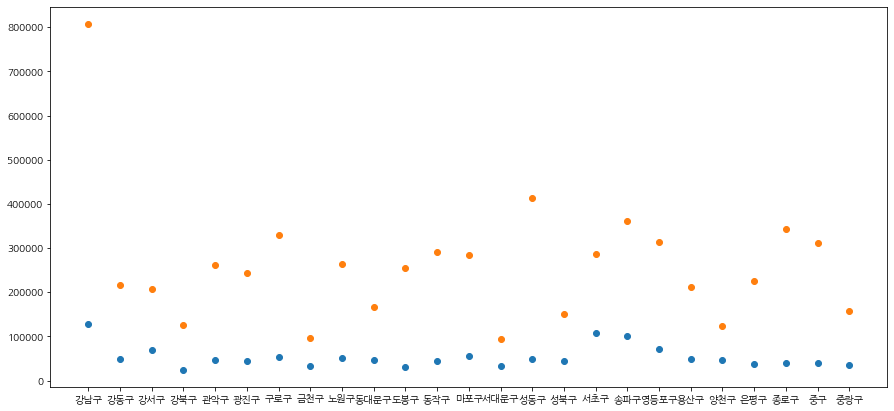

In [20]:
plt.figure(figsize=(15,7))
plt.rc('font', family = 'NanumGothic')
plt.scatter(x=sales['자치구명'], y=sales['유동인구'])
plt.scatter(x=pop['자치구명'], y=pop['sub_pop'])
plt.show()